## Homework 2: Image Features

### Problem 1

**Problem 1 (TBD pts): Image Compression using DFT**

- Compute the DFT of the “Mines” image provided in the homework material.
- Display both DFT magnitude and phase (as images).
- Compress the image by keeping the top 1000 DFT coefficients (in magnitude).
- Display the DFT magnitude image that contains the top 1000 DFT coefficients.
- Reconstruct the original image by using only the top 1000 DFT coefficients (via inverse DFT).
- Display the resulting reconstructed image.
- Answer: How many elements/pixels does the original image have? How many elements does the DFT compression have? What is the compression ratio?

**Notes:**

- For this problem, you can use any existing DFT function/library.
- See the example in lecture "03_2_Fourier_Transform_II."


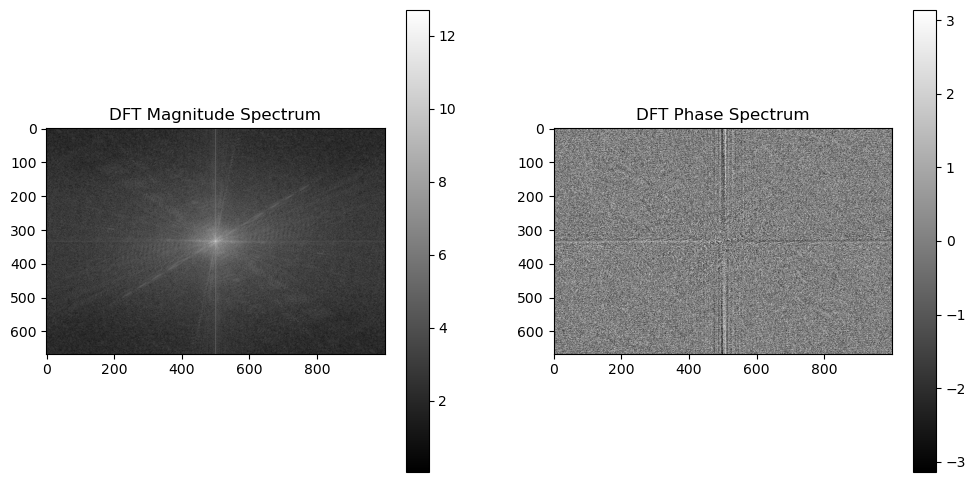

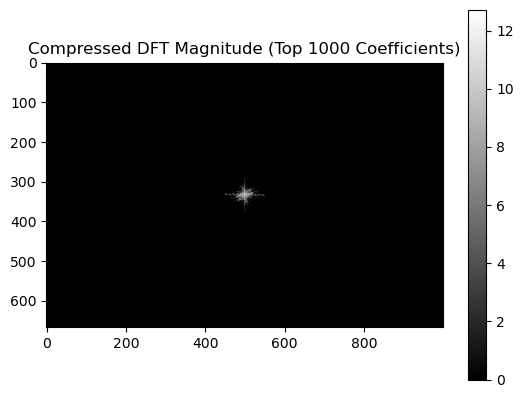

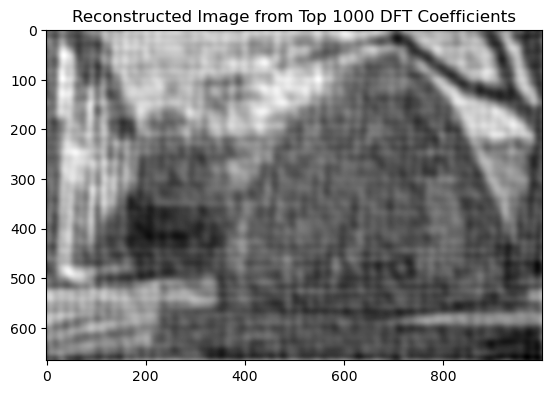

Original image size: 666000 pixels
Compressed image size: 1000 DFT coefficients
Compression ratio: 666.00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from skimage import io

# Load the image (assuming the image is grayscale)
image = io.imread('mines.png', as_gray=True)

# 1. Compute the DFT of the image
dft = fft2(image)
dft_shifted = fftshift(dft)

# 2. Display the DFT magnitude and phase as images
magnitude_spectrum = np.log(np.abs(dft_shifted) + 1)
phase_spectrum = np.angle(dft_shifted)

# Plot DFT Magnitude
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('DFT Magnitude Spectrum')
plt.colorbar()

# Plot DFT Phase
plt.subplot(1, 2, 2)
plt.imshow(phase_spectrum, cmap='gray')
plt.title('DFT Phase Spectrum')
plt.colorbar()
plt.show()

# 3. Compress the image by keeping only the top 1000 DFT coefficients
# Flatten the magnitude spectrum and sort by the top 1000 values
flattened_dft = np.abs(dft_shifted).flatten()
indices = np.argsort(flattened_dft)[-1000:]  # Top 1000 indices

# Create a mask to keep only the top 1000 coefficients
compressed_dft = np.zeros_like(dft_shifted)
flat_dft_shifted = dft_shifted.flatten()
compressed_dft_flat = np.zeros_like(flat_dft_shifted)
compressed_dft_flat[indices] = flat_dft_shifted[indices]
compressed_dft = compressed_dft_flat.reshape(dft_shifted.shape)

# 4. Display the DFT magnitude image with the top 1000 coefficients
compressed_magnitude_spectrum = np.log(np.abs(compressed_dft) + 1)

plt.figure()
plt.imshow(compressed_magnitude_spectrum, cmap='gray')
plt.title('Compressed DFT Magnitude (Top 1000 Coefficients)')
plt.colorbar()
plt.show()

# 5. Reconstruct the original image using inverse DFT
# Apply the inverse shift and inverse DFT
compressed_dft_ishifted = ifftshift(compressed_dft)
reconstructed_image = np.abs(ifft2(compressed_dft_ishifted))

# 6. Display the resulting reconstructed image
plt.figure()
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image from Top 1000 DFT Coefficients')
plt.show()

# 7. Answer: How many elements/pixels does the original image have? 
original_pixels = image.size

# How many elements does the DFT compression have?
compressed_elements = 1000  # Since we kept only the top 1000 coefficients

# What is the compression ratio?
compression_ratio = original_pixels / compressed_elements

print(f"Original image size: {original_pixels} pixels")
print(f"Compressed image size: {compressed_elements} DFT coefficients")
print(f"Compression ratio: {compression_ratio:.2f}")
